In [4]:
import numpy as np
import sys
from matplotlib import pyplot as plt

In [1]:
DATAPATH = '/Users/mitch/Dropbox/FinalProject/traffic2.txt'

In [2]:
#read in data - a row is a sensor, a column is a point in time
traffic_file = open(DATAPATH)
traffic_lines = traffic_file.readlines()
num_sensors = len(traffic_lines)
num_timepoints = len(traffic_lines[0].split())

In [5]:
traffic = np.zeros([num_sensors,num_timepoints])
for i in range(num_sensors):
    tokens = traffic_lines[i].split()
    for j in range(num_timepoints): traffic[i,j] = float(tokens[j])


In [6]:
print(np.shape(traffic))

(963, 63360)


In [7]:
#setup neural network
rolling_window_hours = 4
rolling_window = rolling_window_hours * 6 #each time point is separated by 10 minutes
hidden_units = 200

In [8]:
#this will map from the input layer to the hidden layer
synapse_in = np.random.normal(scale=1.0/np.sqrt(rolling_window),size=[rolling_window,hidden_units]) 
#this will map from the previous hidden layer to the next hidden layer
synapse_hidden = np.random.normal(scale=1.0/np.sqrt(hidden_units),size=[hidden_units,hidden_units])
#this will map from the hidden layer to the output layer
synapse_out = np.random.normal(scale=1.0/np.sqrt(hidden_units),size=[hidden_units,1])

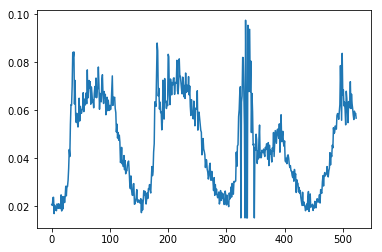

history:  [ 0.0207  0.0203  0.0236  0.0237  0.0169  0.0204  0.0184  0.0188  0.0181
  0.0209  0.0207  0.0191  0.021   0.0194  0.0191  0.019   0.0247  0.018
  0.024   0.0188  0.0223  0.024   0.0215  0.0241  0.0283  0.0243  0.0283
  0.0282  0.0308  0.0358  0.0436  0.0407  0.0542  0.0623  0.0621  0.07
  0.0841  0.0823  0.0843  0.0626  0.0724  0.0579  0.0549  0.0587  0.0549
  0.053   0.0559  0.065   0.0555  0.0616  0.0597  0.0587  0.06    0.0608
  0.0673  0.0594  0.0646  0.0621  0.0637  0.0672  0.0627  0.0768  0.0651
  0.0679  0.0724  0.0693  0.0719  0.0625  0.0697  0.067   0.0632  0.0643
  0.061   0.0669  0.0699  0.0655  0.0734  0.0652  0.0684  0.0692  0.078
  0.0706  0.0604  0.067   0.0646  0.0635  0.0726  0.0748  0.0665  0.0628
  0.0678  0.065   0.0666  0.0581  0.0609  0.0654  0.0598  0.0642  0.0615
  0.0599  0.062   0.0603  0.0621  0.0685  0.0743  0.062   0.0654  0.0649
  0.0654  0.0607  0.059   0.0509  0.0542  0.0484  0.0507  0.0475  0.0496
  0.0467  0.0382  0.0394  0.0445  0.0376  0.0

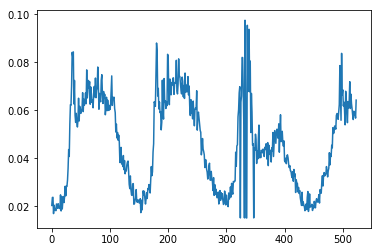

history:  [ 0.0203  0.0236  0.0237  0.0169  0.0204  0.0184  0.0188  0.0181  0.0209
  0.0207  0.0191  0.021   0.0194  0.0191  0.019   0.0247  0.018   0.024
  0.0188  0.0223  0.024   0.0215  0.0241  0.0283  0.0243  0.0283  0.0282
  0.0308  0.0358  0.0436  0.0407  0.0542  0.0623  0.0621  0.07    0.0841
  0.0823  0.0843  0.0626  0.0724  0.0579  0.0549  0.0587  0.0549  0.053
  0.0559  0.065   0.0555  0.0616  0.0597  0.0587  0.06    0.0608  0.0673
  0.0594  0.0646  0.0621  0.0637  0.0672  0.0627  0.0768  0.0651  0.0679
  0.0724  0.0693  0.0719  0.0625  0.0697  0.067   0.0632  0.0643  0.061
  0.0669  0.0699  0.0655  0.0734  0.0652  0.0684  0.0692  0.078   0.0706
  0.0604  0.067   0.0646  0.0635  0.0726  0.0748  0.0665  0.0628  0.0678
  0.065   0.0666  0.0581  0.0609  0.0654  0.0598  0.0642  0.0615  0.0599
  0.062   0.0603  0.0621  0.0685  0.0743  0.062   0.0654  0.0649  0.0654
  0.0607  0.059   0.0509  0.0542  0.0484  0.0507  0.0475  0.0496  0.0467
  0.0382  0.0394  0.0445  0.0376  0.039   0.

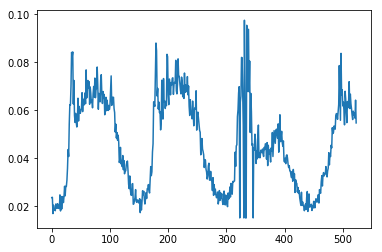

history:  [ 0.0236  0.0237  0.0169  0.0204  0.0184  0.0188  0.0181  0.0209  0.0207
  0.0191  0.021   0.0194  0.0191  0.019   0.0247  0.018   0.024   0.0188
  0.0223  0.024   0.0215  0.0241  0.0283  0.0243  0.0283  0.0282  0.0308
  0.0358  0.0436  0.0407  0.0542  0.0623  0.0621  0.07    0.0841  0.0823
  0.0843  0.0626  0.0724  0.0579  0.0549  0.0587  0.0549  0.053   0.0559
  0.065   0.0555  0.0616  0.0597  0.0587  0.06    0.0608  0.0673  0.0594
  0.0646  0.0621  0.0637  0.0672  0.0627  0.0768  0.0651  0.0679  0.0724
  0.0693  0.0719  0.0625  0.0697  0.067   0.0632  0.0643  0.061   0.0669
  0.0699  0.0655  0.0734  0.0652  0.0684  0.0692  0.078   0.0706  0.0604
  0.067   0.0646  0.0635  0.0726  0.0748  0.0665  0.0628  0.0678  0.065
  0.0666  0.0581  0.0609  0.0654  0.0598  0.0642  0.0615  0.0599  0.062
  0.0603  0.0621  0.0685  0.0743  0.062   0.0654  0.0649  0.0654  0.0607
  0.059   0.0509  0.0542  0.0484  0.0507  0.0475  0.0496  0.0467  0.0382
  0.0394  0.0445  0.0376  0.039   0.0365  0

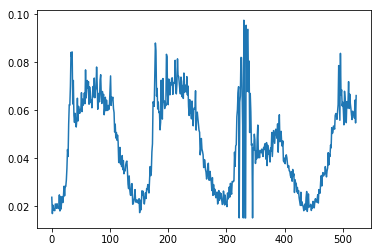

history:  [ 0.0237  0.0169  0.0204  0.0184  0.0188  0.0181  0.0209  0.0207  0.0191
  0.021   0.0194  0.0191  0.019   0.0247  0.018   0.024   0.0188  0.0223
  0.024   0.0215  0.0241  0.0283  0.0243  0.0283  0.0282  0.0308  0.0358
  0.0436  0.0407  0.0542  0.0623  0.0621  0.07    0.0841  0.0823  0.0843
  0.0626  0.0724  0.0579  0.0549  0.0587  0.0549  0.053   0.0559  0.065
  0.0555  0.0616  0.0597  0.0587  0.06    0.0608  0.0673  0.0594  0.0646
  0.0621  0.0637  0.0672  0.0627  0.0768  0.0651  0.0679  0.0724  0.0693
  0.0719  0.0625  0.0697  0.067   0.0632  0.0643  0.061   0.0669  0.0699
  0.0655  0.0734  0.0652  0.0684  0.0692  0.078   0.0706  0.0604  0.067
  0.0646  0.0635  0.0726  0.0748  0.0665  0.0628  0.0678  0.065   0.0666
  0.0581  0.0609  0.0654  0.0598  0.0642  0.0615  0.0599  0.062   0.0603
  0.0621  0.0685  0.0743  0.062   0.0654  0.0649  0.0654  0.0607  0.059
  0.0509  0.0542  0.0484  0.0507  0.0475  0.0496  0.0467  0.0382  0.0394
  0.0445  0.0376  0.039   0.0365  0.0411  0.

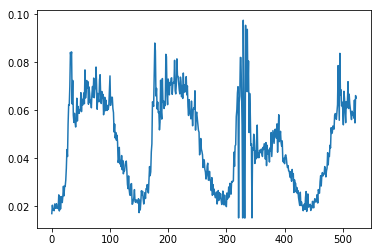

history:  [ 0.0169  0.0204  0.0184  0.0188  0.0181  0.0209  0.0207  0.0191  0.021
  0.0194  0.0191  0.019   0.0247  0.018   0.024   0.0188  0.0223  0.024
  0.0215  0.0241  0.0283  0.0243  0.0283  0.0282  0.0308  0.0358  0.0436
  0.0407  0.0542  0.0623  0.0621  0.07    0.0841  0.0823  0.0843  0.0626
  0.0724  0.0579  0.0549  0.0587  0.0549  0.053   0.0559  0.065   0.0555
  0.0616  0.0597  0.0587  0.06    0.0608  0.0673  0.0594  0.0646  0.0621
  0.0637  0.0672  0.0627  0.0768  0.0651  0.0679  0.0724  0.0693  0.0719
  0.0625  0.0697  0.067   0.0632  0.0643  0.061   0.0669  0.0699  0.0655
  0.0734  0.0652  0.0684  0.0692  0.078   0.0706  0.0604  0.067   0.0646
  0.0635  0.0726  0.0748  0.0665  0.0628  0.0678  0.065   0.0666  0.0581
  0.0609  0.0654  0.0598  0.0642  0.0615  0.0599  0.062   0.0603  0.0621
  0.0685  0.0743  0.062   0.0654  0.0649  0.0654  0.0607  0.059   0.0509
  0.0542  0.0484  0.0507  0.0475  0.0496  0.0467  0.0382  0.0394  0.0445
  0.0376  0.039   0.0365  0.0411  0.0352  0

In [9]:
#for now, I will just look at the first sensor
for i in range(5): #range(num_timepoints-rolling_window):
    history = traffic[0,i:i+rolling_window+500]
    nextup = traffic[0,i+rolling_window]
    plt.plot(history)
    plt.show()
    print("history: ", history)
    print("next: ", nextup)

In [10]:
for timestep in range(len(history)):
    hour = ((timestep*10)//60)%24
    minute = (timestep*10)%60
    if hour<10:
        hour = '0'+str(hour)
    else:
        hour = str(hour)
    if minute == 0:
        minute = '0'+str(minute)
    else:
        minute = str(minute)
        
    print('%s:%s'%(hour,minute),history[timestep])

00:00 0.0169
00:10 0.0204
00:20 0.0184
00:30 0.0188
00:40 0.0181
00:50 0.0209
01:00 0.0207
01:10 0.0191
01:20 0.021
01:30 0.0194
01:40 0.0191
01:50 0.019
02:00 0.0247
02:10 0.018
02:20 0.024
02:30 0.0188
02:40 0.0223
02:50 0.024
03:00 0.0215
03:10 0.0241
03:20 0.0283
03:30 0.0243
03:40 0.0283
03:50 0.0282
04:00 0.0308
04:10 0.0358
04:20 0.0436
04:30 0.0407
04:40 0.0542
04:50 0.0623
05:00 0.0621
05:10 0.07
05:20 0.0841
05:30 0.0823
05:40 0.0843
05:50 0.0626
06:00 0.0724
06:10 0.0579
06:20 0.0549
06:30 0.0587
06:40 0.0549
06:50 0.053
07:00 0.0559
07:10 0.065
07:20 0.0555
07:30 0.0616
07:40 0.0597
07:50 0.0587
08:00 0.06
08:10 0.0608
08:20 0.0673
08:30 0.0594
08:40 0.0646
08:50 0.0621
09:00 0.0637
09:10 0.0672
09:20 0.0627
09:30 0.0768
09:40 0.0651
09:50 0.0679
10:00 0.0724
10:10 0.0693
10:20 0.0719
10:30 0.0625
10:40 0.0697
10:50 0.067
11:00 0.0632
11:10 0.0643
11:20 0.061
11:30 0.0669
11:40 0.0699
11:50 0.0655
12:00 0.0734
12:10 0.0652
12:20 0.0684
12:30 0.0692
12:40 0.078
12:50 0.0706
